<img src="https://raw.githubusercontent.com/jhermosillo/DIPLOMADO_CDP/main/02_Analisis_Estadistico/images/logos/ColorLogo.png">

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jhermosillo/DIPLOMADO_CDP/blob/master/02_Analisis_Estadistico/notebook/Extra_Scrappig_Ejercicio.ipynb)

<h1><center>Otro ejemplo Scrapping</center></h1>
<h3><font color="red">¿Qué hace a una pelicula buena?</font></h3>

La mayoría de las películas mejor calificadas en la base de datos internacional de películas (IMDB) son aclamadas por la crítica y generalmente son una apuesta segura en términos de éxito comercial. 

Naturalmente, sería interesante investigar si estas películas principales tienen algunas características distintivas responsables de sus altas calificaciones. 

----------------
Este proyecto tiene como objetivo descubrir el tipo de clúster natural que existe entre las 250 mejores películas de IMDB. Se emplearán técnicas de aprendizaje automático no supervisadas, más específicamente, algoritmos de agrupamiento. 

----------------
Con suerte, estos grupos nos darán información para observar el patrón recurrente. Para construir nuestro conjunto de datos, usamos la API web de OMDB, que es un servicio [web RESTful](https://www.codigonaranja.com/restful-web-service) para obtener información de películas. 

----------------
Para los resúmenes de la trama, eliminamos la trama de una película del sitio web de IMDB utilizando la biblioteca BeautifulSoup en Python. Nuestro dataframe extraído final tendrá 250 filas.... 


----------------
Las entradas son casi todas de tipo categóricas y las tendremos que codificar con **one hot-encoding**. 

Primero usaremos técnicas de reducción de dimensionalidad como PCA y luego K-Means y DB-SCAN para encontrar grupos en los datos.

In [1]:
# import urllib2
from bs4 import BeautifulSoup
import requests
from requests import get
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns
import datetime as dt
import string
from matplotlib import pyplot as plt
sns.set(style="ticks")

import nltk
from nltk.stem.snowball import SnowballStemmer 
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import os
import codecs
from sklearn import feature_extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet as wn


pd.set_option('display.notebook_repr_html', True)
sns.set(style="ticks")
%matplotlib inline


import seaborn as sns
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

sns.set_context('poster')

La primera parte será recopilar todos los ID de imdb de las 250 mejores películas.

In [2]:
url='http://www.imdb.com/chart/top'
page=get(url).content
soup=BeautifulSoup(page,'html.parser')
class_=soup.find_all(name='div',attrs={'class':'wlb_ribbon'})
movie_ids=[c['data-tconst'] for c in class_]

In [3]:
movie_ids

['tt0111161',
 'tt0068646',
 'tt0071562',
 'tt0468569',
 'tt0050083',
 'tt0108052',
 'tt0167260',
 'tt0110912',
 'tt0060196',
 'tt0120737',
 'tt0137523',
 'tt0109830',
 'tt1375666',
 'tt0167261',
 'tt0080684',
 'tt0133093',
 'tt0099685',
 'tt0073486',
 'tt0047478',
 'tt0114369',
 'tt0118799',
 'tt0317248',
 'tt0102926',
 'tt0038650',
 'tt0076759',
 'tt0120815',
 'tt0245429',
 'tt0120689',
 'tt0816692',
 'tt6751668',
 'tt0110413',
 'tt0114814',
 'tt0056058',
 'tt0110357',
 'tt0088763',
 'tt0253474',
 'tt0103064',
 'tt0120586',
 'tt0027977',
 'tt0054215',
 'tt0172495',
 'tt0021749',
 'tt0407887',
 'tt1675434',
 'tt2582802',
 'tt0482571',
 'tt0095327',
 'tt8503618',
 'tt0064116',
 'tt0034583',
 'tt0095765',
 'tt0047396',
 'tt0078748',
 'tt0078788',
 'tt0209144',
 'tt0032553',
 'tt0082971',
 'tt1853728',
 'tt0405094',
 'tt7286456',
 'tt0050825',
 'tt0910970',
 'tt0081505',
 'tt4154756',
 'tt0043014',
 'tt0051201',
 'tt4633694',
 'tt0119698',
 'tt0364569',
 'tt0057012',
 'tt1345836',
 'tt00

Movie_ids es una lista de las 250 mejores identificaciones de películas de imdb.

Usaremos omdb para la recopilación de datos de estas peliculas.



In [ ]:
movie_info=[[] for i in range(len(movie_ids))]

for i in range(250):
    url='http://www.omdbapi.com/?i='
    print(url+movie_ids[i]+"&apikey=de12b217")
    r=requests.get(url+movie_ids[i]+"&apikey=de12b217").json()
    for a in r.keys():
        movie_info[i].append(r[a])
        
df_omdb=pd.DataFrame(movie_info,columns=r.keys())

In [5]:
df_omdb

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response
0,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,Drama,Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,English,USA,Nominated for 7 Oscars. Another 21 wins & 36 n...,https://m.media-amazon.com/images/M/MV5BMDFkYT...,"[{'Source': 'Internet Movie Database', 'Value'...",80,9.3,"2,296,430",tt0111161,movie,N/A,N/A,"Columbia Pictures, Castle Rock Entertainment",N/A,True
1,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay by), Francis Ford Coppo...","Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,"English, Italian, Latin",USA,Won 3 Oscars. Another 26 wins & 30 nominations.,https://m.media-amazon.com/images/M/MV5BM2MyNj...,"[{'Source': 'Internet Movie Database', 'Value'...",100,9.2,"1,589,401",tt0068646,movie,N/A,N/A,Paramount Pictures,N/A,True
2,The Godfather: Part II,1974,R,18 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay by), Mario Pu...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...,"English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 11 wins & 20 nominations.,https://m.media-amazon.com/images/M/MV5BMWMwMG...,"[{'Source': 'Internet Movie Database', 'Value'...",90,9.0,"1,110,514",tt0071562,movie,N/A,N/A,"Paramount Pictures, Coppola Company",N/A,True
3,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama, Thriller",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker wreaks havo...,"English, Mandarin","USA, UK",Won 2 Oscars. Another 153 wins & 160 nominations.,https://m.media-amazon.com/images/M/MV5BMTMxNT...,"[{'Source': 'Internet Movie Database', 'Value'...",84,9.0,"2,258,183",tt0468569,movie,N/A,N/A,Syncopy,N/A,True
4,12 Angry Men,1957,Approved,10 Apr 1957,96 min,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",A jury holdout attempts to prevent a miscarria...,English,USA,Nominated for 3 Oscars. Another 17 wins & 10 n...,https://m.media-amazon.com/images/M/MV5BMWU4N2...,"[{'Source': 'Internet Movie Database', 'Value'...",96,8.9,"674,457",tt0050083,movie,N/A,N/A,Orion-Nova Pictures,N/A,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,The Battle of Algiers,1966,Not Rated,20 Sep 1967,121 min,"Drama, War",Gillo Pontecorvo,"Franco Solinas, Franco Solinas (story), Gillo ...","Brahim Hadjadj, Jean Martin, Yacef Saadi, Sami...","In the 1950s, fear and violence escalate as th...","Arabic, French, English","Algeria, Italy",Nominated for 3 Oscars. Another 9 wins & 6 nom...,https://m.media-amazon.com/images/M/MV5BZWEzMG...,"[{'Source': 'Internet Movie Database', 'Value'...",96,8.1,"51,591",tt0058946,movie,N/A,N/A,"Cashbah, Igor Film",N/A,True
246,The Terminator,1984,R,26 Oct 1984,107 min,"Action, Sci-Fi",James Cameron,"James Cameron, Gale Anne Hurd, William Wisher ...","Arnold Schwarzenegger, Michael Biehn, Linda Ha...",A human soldier is sent from 2029 to 1984 to s...,"English, Spanish","UK, USA",7 wins & 6 nominations.,https://m.media-amazon.com/images/M/MV5BYTViNz...,"[{'Source': 'Internet Movie Database', 'Value'...",84,8.0,"787,404",tt0088247,movie,N/A,N/A,Pacific Western,N/A,True
247,A Silent Voice: The Movie,2016,Not Rated,17 Sep 2016,130 min,"Animation, Drama, Family, Romance",Naoko Yamada,"Yoshitoki Oima (manga: ""Koe no katachi""), Reik...","Miyu Irino, Saori Hayami, Aoi Yûki, Kenshô Ono",A young man is ostracized by his classmates af...,"Ja

In [6]:
url='http://www.imdb.com/title/'
t='/plotsummary?ref_=tt_stry_pl'
plot=[[] for i in range(len(movie_ids))]
for i in range(250):
    print(url+df_omdb.imdbID[i]+t)
    page=get(url+df_omdb.imdbID[i]+t).content
    soup=BeautifulSoup(page,'html.parser')
    class_=soup.find_all(name='li',attrs={'class':'ipl-zebra-list__item'})
    for j in class_:
        plot[i].append(j.get_text(strip = True))

http://www.imdb.com/title/tt0111161/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0068646/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0071562/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0468569/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0050083/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0108052/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0167260/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0110912/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0060196/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0120737/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0137523/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0109830/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt1375666/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0167261/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0080684/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0133093/plot

http://www.imdb.com/title/tt6966692/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0363163/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0118849/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0105695/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0089881/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0053291/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0347149/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0268978/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0042192/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0112641/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0057115/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0993846/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0457430/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt1305806/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0120735/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0066763/plot

In [7]:
df_omdb['Plot']=plot
df_omdb.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response
0,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,Drama,Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",[Two imprisoned men bond over a number of year...,English,USA,Nominated for 7 Oscars. Another 21 wins & 36 n...,https://m.media-amazon.com/images/M/MV5BMDFkYT...,"[{'Source': 'Internet Movie Database', 'Value'...",80,9.3,"2,296,430",tt0111161,movie,N/A,N/A,"Columbia Pictures, Castle Rock Entertainment",N/A,True
1,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay by), Francis Ford Coppo...","Marlon Brando, Al Pacino, James Caan, Richard ...",[The aging patriarch of an organized crime dyn...,"English, Italian, Latin",USA,Won 3 Oscars. Another 26 wins & 30 nominations.,https://m.media-amazon.com/images/M/MV5BM2MyNj...,"[{'Source': 'Internet Movie Database', 'Value'...",100,9.2,"1,580,895",tt0068646,movie,N/A,N/A,Paramount Pictures,N/A,True
2,The Godfather: Part II,1974,R,18 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay by), Mario Pu...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",[The early life and career of Vito Corleone in...,"English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 11 wins & 20 nominations.,https://m.media-amazon.com/images/M/MV5BMWMwMG...,"[{'Source': 'Internet Movie Database', 'Value'...",90,9.0,"1,104,638",tt0071562,movie,N/A,N/A,"Paramount Pictures, Coppola Company",N/A,True
3,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama, Thriller",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",[When the menace known as the Joker wreaks hav...,"English, Mandarin","USA, UK",Won 2 Oscars. Another 153 wins & 160 nominations.,https://m.media-amazon.com/images/M/MV5BMTMxNT...,"[{'Source': 'Internet Movie Database', 'Value'...",84,9.0,"2,258,183",tt0468569,movie,N/A,N/A,Syncopy,N/A,True
4,12 Angry Men,1957,Approved,10 Apr 1957,96 min,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",[A jury holdout attempts to prevent a miscarri...,English,USA,Nominated for 3 Oscars. Another 17 wins & 10 n...,https://m.media-amazon.com/images/M/MV5BMWU4N2...,"[{'Source': 'Internet Movie Database', 'Value'...",96,8.9,"674,457",tt0050083,movie,N/A,N/A,Orion-Nova Pictures,N/A,True


### Limpieza de datos

El primer paso para limpiar los datos es convertir Year en una variable categórica. 

Se elegirá el año del 200 como corte adecuado. Las películas lanzadas antes del 2000 se convirtieron en 0 y después de 2000 en 1. Después de hacer esto, realizamos un one-hot encoding.

In [8]:
df_omdb.Year=pd.to_numeric(df_omdb.Year)
for i in range(250):
    if df_omdb.Year[i]<2000:
        df_omdb.Year[i]=0
    else:
        df_omdb.Year[i]=1
dummy_year=pd.get_dummies(df_omdb.Year)

for i in range(250):
    df_omdb.Runtime[i]=df_omdb.Runtime[i].split()[0]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [9]:
df_omdb

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response
0,The Shawshank Redemption,0,R,14 Oct 1994,142,Drama,Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",[Two imprisoned men bond over a number of year...,English,USA,Nominated for 7 Oscars. Another 21 wins & 36 n...,https://m.media-amazon.com/images/M/MV5BMDFkYT...,"[{'Source': 'Internet Movie Database', 'Value'...",80,9.3,"2,296,430",tt0111161,movie,N/A,N/A,"Columbia Pictures, Castle Rock Entertainment",N/A,True
1,The Godfather,0,R,24 Mar 1972,175,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay by), Francis Ford Coppo...","Marlon Brando, Al Pacino, James Caan, Richard ...",[The aging patriarch of an organized crime dyn...,"English, Italian, Latin",USA,Won 3 Oscars. Another 26 wins & 30 nominations.,https://m.media-amazon.com/images/M/MV5BM2MyNj...,"[{'Source': 'Internet Movie Database', 'Value'...",100,9.2,"1,580,895",tt0068646,movie,N/A,N/A,Paramount Pictures,N/A,True
2,The Godfather: Part II,0,R,18 Dec 1974,202,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay by), Mario Pu...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",[The early life and career of Vito Corleone in...,"English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 11 wins & 20 nominations.,https://m.media-amazon.com/images/M/MV5BMWMwMG...,"[{'Source': 'Internet Movie Database', 'Value'...",90,9.0,"1,104,638",tt0071562,movie,N/A,N/A,"Paramount Pictures, Coppola Company",N/A,True
3,The Dark Knight,1,PG-13,18 Jul 2008,152,"Action, Crime, Drama, Thriller",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",[When the menace known as the Joker wreaks hav...,"English, Mandarin","USA, UK",Won 2 Oscars. Another 153 wins & 160 nominations.,https://m.media-amazon.com/images/M/MV5BMTMxNT...,"[{'Source': 'Internet Movie Database', 'Value'...",84,9.0,"2,258,183",tt0468569,movie,N/A,N/A,Syncopy,N/A,True
4,12 Angry Men,0,Approved,10 Apr 1957,96,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",[A jury holdout attempts to prevent a miscarri...,English,USA,Nominated for 3 Oscars. Another 17 wins & 10 n...,https://m.media-amazon.com/images/M/MV5BMWU4N2...,"[{'Source': 'Internet Movie Database', 'Value'...",96,8.9,"674,457",tt0050083,movie,N/A,N/A,Orion-Nova Pictures,N/A,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,The Battle of Algiers,0,Not Rated,20 Sep 1967,121,"Drama, War",Gillo Pontecorvo,"Franco Solinas, Franco Solinas (story), Gillo ...","Brahim Hadjadj, Jean Martin, Yacef Saadi, Sami...","[In the 1950s, fear and violence escalate as t...","Arabic, French, English","Algeria, Italy",Nominated for 3 Oscars. Another 9 wins & 6 nom...,https://m.media-amazon.com/images/M/MV5BZWEzMG...,"[{'Source': 'Internet Movie Database', 'Value'...",96,8.1,"51,591",tt0058946,movie,N/A,N/A,"Cashbah, Igor Film",N/A,True
246,The Terminator,0,R,26 Oct 1984,107,"Action, Sci-Fi",James Cameron,"James Cameron, Gale Anne Hurd, William Wisher ...","Arnold Schwarzenegger, Michael Biehn, Linda Ha...",[A human soldier is sent from 2029 to 1984 to ...,"English, Spanish","UK, USA",7 wins & 6 nominations.,https://m.media-amazon.com/images/M/MV5BYTViNz...,"[{'Source': 'Internet Movie Database', 'Value'...",84,8.0,"787,404",tt0088247,movie,N/A,N/A,Pacific Western,N/A,True
247,A Silent Voice: The Movie,1,Not Rated,17 Sep 2016,130,"Animation, Drama, Family, Romance",Naoko Yamada,"Yoshitoki Oima (manga: ""Koe no katachi""), Reik...","Miyu Irino, Saori Hayami, Aoi Yûki, Kenshô Ono",[A young man is ostracized by his classmates a...,"Japanese, Japanese Sign Language",Japan,4 wins & 5 nominat

In [10]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df_omdb)
prof.to_file('output.html')

El siguiente paso es convertir Runtime en una variable categórica. Se eligió un tiempo de  125 minutos como límite adecuado porque era el valor medio de todos los puntos de datos. Las películas que tienen un tiempo de ejecución inferior a 125 minutos se convierten en 0 y más de 125 minutos se convierten en 1.

In [11]:
df_omdb.dtypes

Title         object
Year           int64
Rated         object
Released      object
Runtime       object
Genre         object
Director      object
Writer        object
Actors        object
Plot          object
Language      object
Country       object
Awards        object
Poster        object
Ratings       object
Metascore     object
imdbRating    object
imdbVotes     object
imdbID        object
Type          object
DVD           object
BoxOffice     object
Production    object
Website       object
Response      object
dtype: object

In [12]:
df_omdb['Runtime'] = pd.to_numeric(df_omdb['Runtime'])

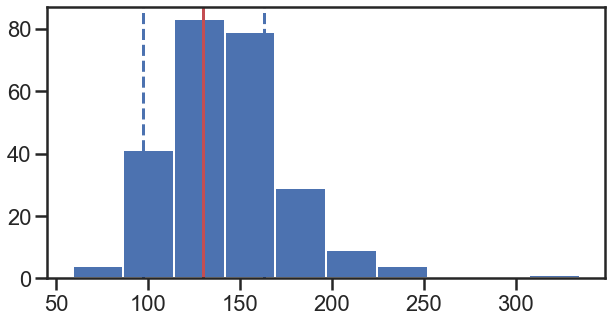

In [13]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.hist(df_omdb['Runtime'],edgecolor='white',align='right')
ax.axvline(x=np.mean(df_omdb['Runtime']),c='r')
ax.axvline(x=np.mean(df_omdb['Runtime'])-np.std(df_omdb['Runtime']),c='b',ls='--')
ax.axvline(x=np.mean(df_omdb['Runtime'])+np.std(df_omdb['Runtime']),c='b',ls='--')
plt.show()

In [11]:
df_omdb['Runtime']=pd.to_numeric(df_omdb['Runtime'],errors='coerce')
for i in range(250):
    if df_omdb.Runtime[i]<=125:
        df_omdb.Runtime[i]=0
    else: 
        df_omdb.Runtime[i]=1

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
def clean(column_name):
    """This function takes a column from the dataframe and splits two elements
       if they are separated by a comma.
       For ex. in Actors column there might be values such as Christian Bale, Morgan Freeman.
       This will separate these two actors and store them individually in a list."""
    name=set()
    for name_string in df_omdb[column_name]:
        name.update(name_string.split(', '))
    name=sorted(name)
    return name

def top(column_name):
    """This function takes its input as name of the column and returns a sorted list of the 
       elements which occur very frequently in that column in descending order."""
    
    name=clean(column_name)
    dummy_name=pd.DataFrame()
    for n in name:
        dummy_name[n]=[int(n in nm.split(', ')) for nm in df_omdb[column_name]] 
    
    namelist=[n for n in name]
    nlt=dummy_name[namelist].sum()
    nlt=nlt.sort_values(axis=0,ascending=False)
    return nlt.index
    
def plot_column(column_name,n_elem_display=0):
    """ This function is used to plot a bar graph of a column of the dataframe.
        It takes its argument as name of column and number of elements to display and
        return a bar graph of the user defined number of top elements which occur
        frequently in that column."""
    
    name=clean(column_name)
    dummy_name=pd.DataFrame()
    for n in name:
        dummy_name[n]=[int(n in nm.split(', ')) for nm in df_omdb[column_name]] 
    
    namelist=[n for n in name]
    nlt=dummy_name[namelist].sum()
    nlt=nlt.sort_values(axis=0,ascending=False)
    if n_elem_display !=0:
        return nlt[:n_elem_display].plot(kind = "bar",figsize=(10,10))
    else:
        return nlt[:].plot(kind = "bar",figsize=(10,5))

<AxesSubplot:>

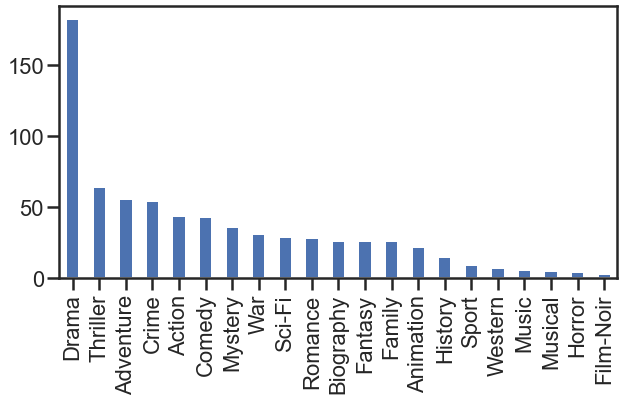

In [16]:
plot_column('Genre')

Elegiremos todos los géneros como nuestros predictores en nuestro conjunto de datos.

In [17]:
#Get the unique genres contained in the dataframe
genres=clean('Genre')
#Add one column for every genre in the dataframe
for genre in genres:
    df_omdb["genre:"+genre] = [int(genre in g.split(', ')) for g in df_omdb.Genre]

In [18]:
df_omdb.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,genre:Action,genre:Adventure,genre:Animation,genre:Biography,genre:Comedy,genre:Crime,genre:Drama,genre:Family,genre:Fantasy,genre:Film-Noir,genre:History,genre:Horror,genre:Music,genre:Musical,genre:Mystery,genre:Romance,genre:Sci-Fi,genre:Sport,genre:Thriller,genre:War,genre:Western
0,The Shawshank Redemption,0,R,14 Oct 1994,1,Drama,Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",[Two imprisoned men bond over a number of year...,English,USA,Nominated for 7 Oscars. Another 21 wins & 36 n...,https://m.media-amazon.com/images/M/MV5BMDFkYT...,"[{'Source': 'Internet Movie Database', 'Value'...",80,9.3,"2,296,430",tt0111161,movie,N/A,N/A,"Columbia Pictures, Castle Rock Entertainment",N/A,True,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,The Godfather,0,R,24 Mar 1972,1,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay by), Francis Ford Coppo...","Marlon Brando, Al Pacino, James Caan, Richard ...",[The aging patriarch of an organized crime dyn...,"English, Italian, Latin",USA,Won 3 Oscars. Another 26 wins & 30 nominations.,https://m.media-amazon.com/images/M/MV5BM2MyNj...,"[{'Source': 'Internet Movie Database', 'Value'...",100,9.2,"1,580,895",tt0068646,movie,N/A,N/A,Paramount Pictures,N/A,True,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,The Godfather: Part II,0,R,18 Dec 1974,1,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay by), Mario Pu...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",[The early life and career of Vito Corleone in...,"English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 11 wins & 20 nominations.,https://m.media-amazon.com/images/M/MV5BMWMwMG...,"[{'Source': 'Internet Movie Database', 'Value'...",90,9.0,"1,104,638",tt0071562,movie,N/A,N/A,"Paramount Pictures, Coppola Company",N/A,True,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,The Dark Knight,1,PG-13,18 Jul 2008,1,"Action, Crime, Drama, Thriller",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",[When the menace known as the Joker wreaks hav...,"English, Mandarin","USA, UK",Won 2 Oscars. Another 153 wins & 160 nominations.,https://m.media-amazon.com/images/M/MV5BMTMxNT...,"[{'Source': 'Internet Movie Database', 'Value'...",84,9.0,"2,258,183",tt0468569,movie,N/A,N/A,Syncopy,N/A,True,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,12 Angry Men,0,Approved,10 Apr 1957,0,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",[A jury holdout attempts to prevent a miscarri...,English,USA,Nominated for 3 Oscars. Another 17 wins & 10 n...,https://m.media-amazon.com/images/M/MV5BMWU4N2...,"[{'Source': 'Internet Movie Database', 'Value'...",96,8.9,"674,457",tt0050083,movie,N/A,N/A,Orion-Nova Pictures,N/A,True,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Ahora analicemos la cantidad de actores que se pueden usar como predictores en nuestro conjunto de datos.

<AxesSubplot:>

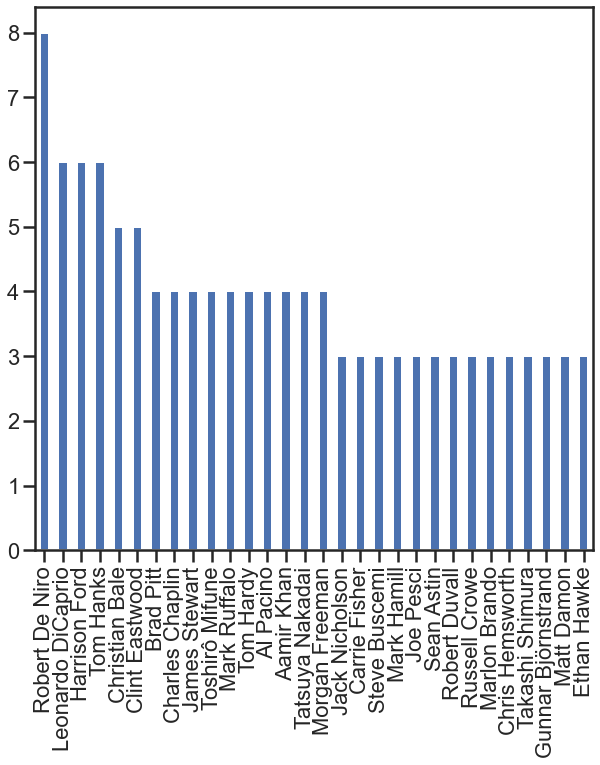

In [19]:
plot_column('Actors',30)

Por lo tanto, podemos tomar a los 30 actores principales, cada uno con más de 3 películas, en la lista de 250 películas principales de imdb.

In [20]:
#Adding actors to our dataset
actors=top('Actors')
actors
for actor in actors[:30]:
    df_omdb["Actor:"+actor] = [int(actor in a.split(', ')) for a in df_omdb.Actors]

------ 

Ahora los Directores

<AxesSubplot:>

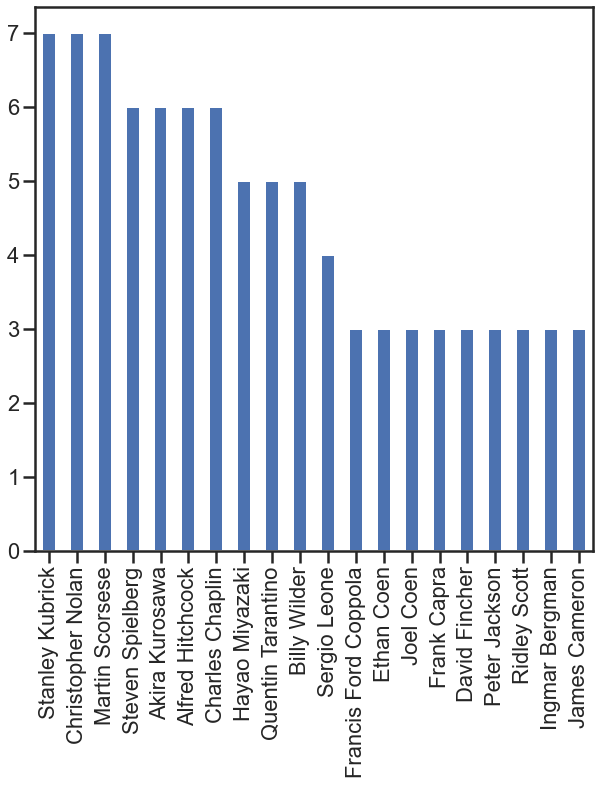

In [21]:
plot_column('Director',20)

In [22]:
directors=top('Director')
    
for director in directors[:20]:
    df_omdb["Director:"+director] = [int(director in d.split(', ')) for d in df_omdb.Director]

Analizar si tomar escritores o no como predictores.

In [23]:
writers1=set()
writers2=set()
for writer_string in df_omdb.Writer:
    writers1.update(writer_string.split(', '))
for j in writers1:
    writers2.update(j.rsplit(' (')[:1])
writers2 = sorted(writers2)

dummy_writers=pd.DataFrame()

# Add one column for every writer in the dataframe
for writer in writers2:
    dummy_writers[writer] = [int(writer in w.split(', ')) for w in df_omdb.Writer]   
dummy_writers

,Gamora & Drax created by),Gamora and Drax created by),Vengeance Trilogy),Aaron Guzikowski,Abby Mann,Abhijat Joshi,Adam Elliot,Adolfo Franci,Adolph Green,Adrian Molina,Agatha Christie,Agenore Incrocci,Akhilesh Jaiswal,Akira Kurosawa,Akiva Goldsman,Akiyuki Nosaka,Al Boasberg,Alan Ball,Alan Mak,Albert Hackett,Alec Coppel,Alec Sokolow,Ales Adamovich,Amole Gupte,Amy Poehler,Andrei Tarkovsky,Andrew Kevin Walker,Andrew Knight,Andrew Niccol,Andrew Stanton,Andrey Konchalovskiy,Andy Gaskill,Anthony Burgess,Anthony Tambakis,Anton Chekhov,Anurag Kashyap,Arijit Biswas,Arkadiy Strugatskiy,Arthur C. Clarke,Asghar Farhadi,Ashley Montagu,Auguste Le Breton,B. Traven,Barry Johnson,Ben Affleck,Bernardo Bertolucci,Bernd Eichinger,Betty Comden,Bill Finger,Bill Hader,...,Terence Winter,Terry George,Terry Gilliam,Terry Jones,Terry Rossio,Terry Southern,Thea von Harbou,Thom Enriquez,Thomas Harris,Thomas Keneally,Thomas Narcejac,Thomas Vinterberg,Tobias Lindholm,Todd Phillips,Tom McCarthy,Tom Schulman,Tom Sito,Traudl Junge,Uma Thurman,Upendra Sidhaye,Upton Sinclair,Valérie Beaugrand-Champagne,Vanna Paoli,Vidhu Vinod Chopra,Vincenzo Cerami,Vittorio De Sica,W.R. Burnett,Wajdi Mouawad,Walter Donohue,Walter Hill,Wes Anderson,William Davies,William Goldman,William Makepeace Thackeray,William Monahan,William Nicholson,William Shakespeare,William Wisher,Winston Groom,Wladyslaw Szpilman,Wolfgang Petersen,Yasuhiko Takiguchi,Yasujirô Ozu,Yavuz Turgul,Yogesh Chandekar,Yoshitoki Oima,Zach Lewis,Zeishan Quadri,Çagan Irmak,Éric Toledano
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
246,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
247,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
248,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

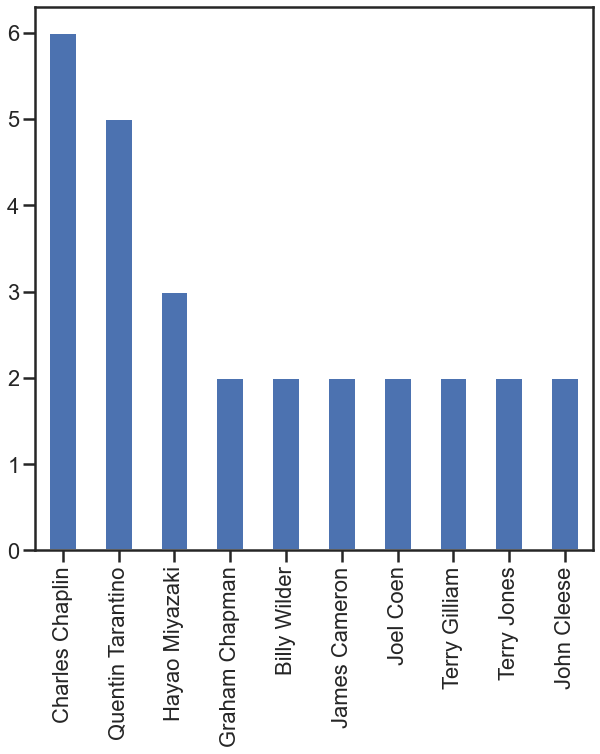

In [24]:
writerlist=[w for w in writers2]
wlt=dummy_writers[writerlist].sum()
wlt=wlt.sort_values(axis=0,ascending=False)
wlt.iloc[0:10].plot(kind = "bar",figsize=(10,10))

Dado que no hay muchos escritores que tengan un número significativo de películas, decidimos no tomar a los escritores como uno de nuestros predictores.

Ahora, exploraremos el predictor de lenguaje

<AxesSubplot:>

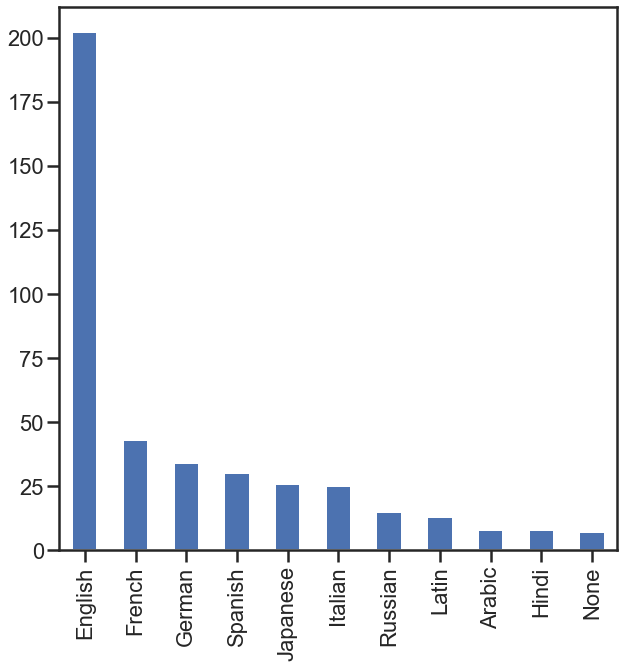

In [25]:
plot_column('Language',11)

In [26]:
df_omdb.shape

(250, 96)

Ahora por paises....

<AxesSubplot:>

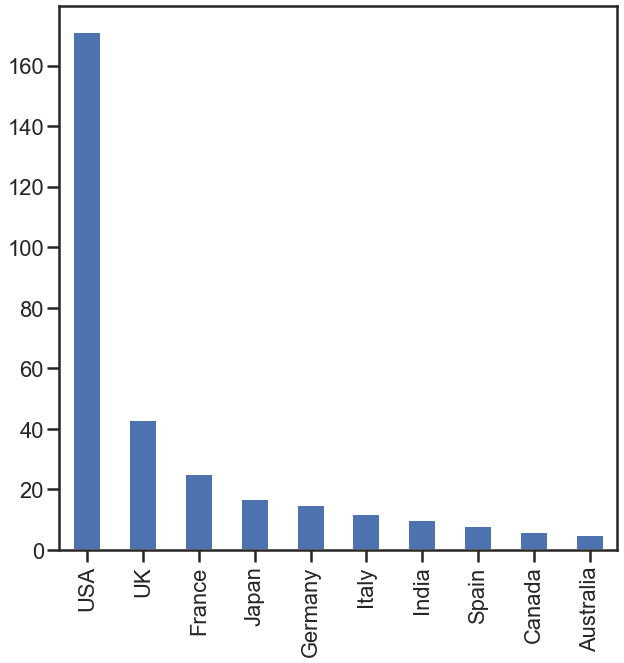

In [27]:
plot_column('Country',10)

Seleccionaremos los 10 países principales como nuestros predictores

In [28]:
#Adding all of the top 10 countries to our datset
countries=top('Country')

for country in countries[:10]:
    df_omdb["Country:"+country] = [int(country in c.split(', ')) for c in df_omdb.Country]

In [29]:
df_omdb.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,genre:Action,genre:Adventure,genre:Animation,genre:Biography,genre:Comedy,genre:Crime,genre:Drama,genre:Family,genre:Fantasy,genre:Film-Noir,genre:History,genre:Horror,genre:Music,genre:Musical,genre:Mystery,genre:Romance,genre:Sci-Fi,genre:Sport,genre:Thriller,genre:War,genre:Western,Actor:Robert De Niro,Actor:Leonardo DiCaprio,Actor:Harrison Ford,Actor:Tom Hanks,...,Actor:Mark Ruffalo,Actor:Tom Hardy,Actor:Al Pacino,Actor:Aamir Khan,Actor:Tatsuya Nakadai,Actor:Morgan Freeman,Actor:Jack Nicholson,Actor:Carrie Fisher,Actor:Steve Buscemi,Actor:Mark Hamill,Actor:Joe Pesci,Actor:Sean Astin,Actor:Robert Duvall,Actor:Russell Crowe,Actor:Marlon Brando,Actor:Chris Hemsworth,Actor:Takashi Shimura,Actor:Gunnar Björnstrand,Actor:Matt Damon,Actor:Ethan Hawke,Director:Stanley Kubrick,Director:Christopher Nolan,Director:Martin Scorsese,Director:Steven Spielberg,Director:Akira Kurosawa,Director:Alfred Hitchcock,Director:Charles Chaplin,Director:Hayao Miyazaki,Director:Quentin Tarantino,Director:Billy Wilder,Director:Sergio Leone,Director:Francis Ford Coppola,Director:Ethan Coen,Director:Joel Coen,Director:Frank Capra,Director:David Fincher,Director:Peter Jackson,Director:Ridley Scott,Director:Ingmar Bergman,Director:James Cameron,Country:USA,Country:UK,Country:France,Country:Japan,Country:Germany,Country:Italy,Country:India,Country:Spain,Country:Canada,Country:Australia
0,The Shawshank Redemption,0,R,14 Oct 1994,1,Drama,Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",[Two imprisoned men bond over a number of year...,English,USA,Nominated for 7 Oscars. Another 21 wins & 36 n...,https://m.media-amazon.com/images/M/MV5BMDFkYT...,"[{'Source': 'Internet Movie Database', 'Value'...",80,9.3,"2,296,430",tt0111161,movie,N/A,N/A,"Columbia Pictures, Castle Rock Entertainment",N/A,True,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,The Godfather,0,R,24 Mar 1972,1,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay by), Francis Ford Coppo...","Marlon Brando, Al Pacino, James Caan, Richard ...",[The aging patriarch of an organized crime dyn...,"English, Italian, Latin",USA,Won 3 Oscars. Another 26 wins & 30 nominations.,https://m.media-amazon.com/images/M/MV5BM2MyNj...,"[{'Source': 'Internet Movie Database', 'Value'...",100,9.2,"1,580,895",tt0068646,movie,N/A,N/A,Paramount Pictures,N/A,True,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,The Godfather: Part II,0,R,18 Dec 1974,1,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay by), Mario Pu...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",[The early life and career of Vito Corleone in...,"English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 11 wins & 20 nominations.,https://m.media-amazon.com/images/M/MV5BMWMwMG...,"[{'Source': 'Internet Movie Database', 'Value'...",90,9.0,"1,104,638",tt0071562,movie,N/A,N/A,"Paramount Pictures, Coppola Company",N/A,True,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,The Dark Knight,1,PG-13,18 Jul 2008,1,"Action, Crime, Drama, Thriller",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",[When the menace known as the Joker wreaks hav...,"English, Mandarin","USA, UK",Won 2 Oscars. Another 153 wins & 160 nominations.,https://m.media-amazon.com/images/M/MV5BMTMxNT...,"[{'Source': 'Internet Movie Database', 'Value'...",84,9.0,"2,258,183",tt0468569,movie,N/A,N/A,Syncopy,N/A,Tr

### Procesamiento de gráficos

En la siguiente etapa, primero limpiaremos y convertiremos en tokens la trama de cada película e intentaremos extraer palabras que puedan usarse como características en nuestro algoritmo de agrupamiento.

In [30]:
## Function for text cleaning,tokenizing,lemmatizing and POS Tagging

def my_analyzer(s):
# Synonym List
    syns = {'wont':'would not', 'cant':'can not', 'cannot':'can not', \
    'couldnt':'could not', 'shouldnt':'should not', \
    'wouldnt':'would not', 'straightforward': 'straight forward' }
    # Preprocess String s
    s = s.lower()
    #Replace special characters with spaces
    s = s.replace('-', ' ')
    s = s.replace('_', ' ')
    s = s.replace(',', '. ')
    s = s.replace('\\',"")
    s = s.replace('.',"")

    # Replace not contraction with not
    s = s.replace("'nt", " not")
    s = s.replace("n't", " not")

    # Tokenize
    tokens = word_tokenize(s)

    #tokens = [word.replace(',','') for word in tokens ]

    tokens = [word for word in tokens if ('*' not in word) and \
    ("''" != word) and ("``" != word) and \
    (word!='description') and (word !='dtype') \
    and (word != 'object') and (word!="'s")]

    # Map synonyms
    for i in range(len(tokens)):
        if tokens[i] in syns:
            tokens[i] = syns[tokens[i]]

    # Remove stop words
    punctuation = list(string.punctuation)+['..', '...']
    pronouns = ['i', 'he', 'she', 'it', 'him', 'they', 'we', 'us', 'them','he ']
    others = ["'d", "co", "ed", "put", "say", "get", "can", "become",\
            "los", "sta", "la", "use","ask" "iii", "else","doesn't","dr.","well","let","soon","finally","around","little",\
              "would","set","use","place","still","three","arrive","next","anoth","keep","must","mr.","bring",\
              "much","many","eventually","explain","asks","along","may","small","hold","realize","think","continue",\
             "last","behind","discover","something","several","end","large","high","mr","the","dr","mr"]
    names = ["harry","travis","tommy","joe","jack","dorothy","mike","george","frank","frankie",\
            "frank ","sarah","andrew","taylor","arthur","luke","kane","wallace","parker","danny","tony",\
            "michael","luke","kane","danny","john","max","tom","paul","ca","neil","maria","barry","anna","jerry",\
            "alex","terry","henry","gordon","leonard","wayne","vincent","jimmy","jordan","sam","nick","nicholson",\
            "jake","rocky"]

    stop = stopwords.words('english') + punctuation + pronouns + others + names
    filtered_terms = [word for word in tokens if (word not in stop) and \
    (len(word)>1) and (not word.replace('.','',1).isnumeric()) \
    and (not word.replace("'",'',2).isnumeric())]

    # Lemmatization & Stemming - Stemming with WordNet POS
    # Since lemmatization requires POS need to set POS
    tagged_words = pos_tag(filtered_terms, lang='eng')

    # Stemming with for terms without WordNet POS
    stemmer = SnowballStemmer("english")
    wn_tags = {'N':wn.NOUN, 'J':wn.ADJ, 'V':wn.VERB, 'R':wn.ADV}
    wnl = WordNetLemmatizer()
    stemmed_tokens = []
    for tagged_token in tagged_words:
        term = tagged_token[0]
        pos = tagged_token[1]
        pos = pos[0]
        try:
            pos = wn_tags[pos]
            stemmed_tokens.append(wnl.lemmatize(term, pos=pos))
        except:
            stemmed_tokens.append(stemmer.stem(term))
    return stemmed_tokens

In [31]:
n_plots = len(df_omdb['Plot']) # Number of Plots
s_words = 'english' # Stop Word Dictionary
ngram = (1,3) # n-gram POS modeling
plots = df_omdb['Plot'].map(str) # place all text reviews in reviews
tfidf=True

In [32]:
# Create Word Frequency by Review Matrix using Custom Analyzer
cv = CountVectorizer(max_df=0.9, min_df=3, max_features=None ,\
analyzer=my_analyzer, ngram_range=ngram)
tf1 = cv.fit_transform(plots)
terms1 = cv.get_feature_names()
term_sums = tf1.sum(axis=0)
term_counts = []
out1 = []
out2 = []
for i in range(len(terms1)):
    term_counts.append([terms1[i], term_sums[0,i]])
def sortSecond(e):
    return e[1]
term_counts.sort(key=sortSecond, reverse=True)
print("\nTerms with Highest Frequency:")
for i in range(400):
    print('{:<15s}{:>5d}'.format(term_counts[i][0], term_counts[i][1]))
    out1.append([term_counts[i][0], term_counts[i][1]])
np.savetxt("frequency_100.csv", out1, delimiter=",", fmt='%s')
print("")


Terms with Highest Frequency:
tell            2119
find            1695
back            1343
see             1339
leave           1284
man             1206
say             1064
time            1044
two             1021
kill             994
give             986
try              986
come             957
life             884
know             858
call             795
men              784
get              759
new              745
look             730
father           726
day              725
begin            724
work             721
year             718
want             705
return           689
room             689
meet             683
away             675
name             657
run              644
home             639
help             638
also             627
car              625
old              588
way              581
police           578
like             561
first            559
head             559
young            554
however          552
friend           551
family           549
sho

Después de calcular la frecuencia de palabras, ahora calcularemos la puntuación TF-IDF de cada palabra para ver y extraer qué palabras tienen una puntuación más alta y se pueden usar como características en la agrupación.

In [33]:
# if tfidf is requested, replace tf matrix with frequencies weighted by IDF
if tfidf == True:
    # Construct the TF/IDF matrix from the data
    print("Conducting Term/Frequency Matrix using TF-IDF")
    tfidf_vect = TfidfVectorizer(max_df=0.7, min_df=5, \
    max_features=None,\
    analyzer=my_analyzer, ngram_range=ngram)
    tf = tfidf_vect.fit_transform(plots)
    terms = tfidf_vect.get_feature_names()
    term_idf_sums = tf.sum(axis=0)
    term_idf_scores = []
    for i in range(len(terms)):
        term_idf_scores.append([terms[i], term_idf_sums[0,i]])
    print("The Term/Frequency matrix has", tf.shape[0], " rows, and",\
        tf.shape[1], " columns.")
    print("The Term list has", len(terms), " terms.")
    term_idf_scores.sort(key=sortSecond, reverse=True)
    print("\nTerms with Highest TF-IDF Scores:")
    for i in range(100):
        print('{:<15s}{:>8.2f}'.format(term_idf_scores[i][0], \
        term_idf_scores[i][1]))
        out2.append([term_idf_scores[i][0], term_idf_scores[i][1]])
        np.savetxt("tfidf1_100.csv", out2, delimiter=",", fmt='%s')

Conducting Term/Frequency Matrix using TF-IDF
The Term/Frequency matrix has 250  rows, and 5323  columns.
The Term list has 5323  terms.

Terms with Highest TF-IDF Scores:
kill               6.96
father             6.94
say                5.91
police             5.82
family             5.81
men                5.63
son                5.20
child              5.11
car                5.08
friend             4.88
wife               4.84
young              4.83
home               4.82
old                4.81
room               4.78
mother             4.68
woman              4.61
money              4.51
boy                4.48
war                4.41
love               4.40
run                4.28
live               4.20
night              4.09
german             4.06
film               3.92
house              3.88
train              3.85
school             3.82
murder             3.82
girl               3.81
story              3.80
fight              3.79
show               3.76
brother     

In [34]:
## Creating a dataframe of all frequent words from count_vectorizer
k = tf1.todense()
freq = pd.DataFrame(k,columns = terms1)
freq_words = freq.sum(axis = 0)
freq = freq.append(freq_words,ignore_index = True)

In [35]:
## Transposing and rearranging
freq.t = freq.T
freq.t = freq.t.reset_index()
freq.t = freq.t.drop(['index'],axis = 1)
freq.t.index = terms1
freq.t.columns.values[250] = "freq_sum"
freq.t = freq.t.sort_values("freq_sum",ascending = False)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [36]:
## Taking top words from the entire dataframe
words_df = freq.t.T
top_words = ["young", "man", "help", "life", "war", "police", "family", "journey", 
             "jewish", "son", "boy", "world", "love", "save", "dark", "friends", "murder"]
df = words_df[top_words]

df_encoded = df
df_encoded[df_encoded!=0] = 1

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\lib\site-packages\pandas\core\frame.py:3089: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


In [37]:
df_final2 = pd.concat([df_omdb, df_encoded], axis=1)
df_final2 = df_final2.drop(['Released','Genre','Director','Writer','Actors','Plot','Language',\
                          'Country','Awards','Poster','Ratings','Metascore','imdbVotes','imdbID','Type',\
                         'DVD','BoxOffice','Production','Website','Response','Rated','imdbRating'],axis = 1)

In [38]:
df_final2.dropna(inplace=True)
print(df_final2.shape)
df_final2.head()
df_dbscan=df_final2

(250, 101)


In [39]:
df_final2.head()

,Title,Year,Runtime,genre:Action,genre:Adventure,genre:Animation,genre:Biography,genre:Comedy,genre:Crime,genre:Drama,genre:Family,genre:Fantasy,genre:Film-Noir,genre:History,genre:Horror,genre:Music,genre:Musical,genre:Mystery,genre:Romance,genre:Sci-Fi,genre:Sport,genre:Thriller,genre:War,genre:Western,Actor:Robert De Niro,Actor:Leonardo DiCaprio,Actor:Harrison Ford,Actor:Tom Hanks,Actor:Christian Bale,Actor:Clint Eastwood,Actor:Brad Pitt,Actor:Charles Chaplin,Actor:James Stewart,Actor:Toshirô Mifune,Actor:Mark Ruffalo,Actor:Tom Hardy,Actor:Al Pacino,Actor:Aamir Khan,Actor:Tatsuya Nakadai,Actor:Morgan Freeman,Actor:Jack Nicholson,Actor:Carrie Fisher,Actor:Steve Buscemi,Actor:Mark Hamill,Actor:Joe Pesci,Actor:Sean Astin,Actor:Robert Duvall,Actor:Russell Crowe,Actor:Marlon Brando,Actor:Chris Hemsworth,...,Actor:Gunnar Björnstrand,Actor:Matt Damon,Actor:Ethan Hawke,Director:Stanley Kubrick,Director:Christopher Nolan,Director:Martin Scorsese,Director:Steven Spielberg,Director:Akira Kurosawa,Director:Alfred Hitchcock,Director:Charles Chaplin,Director:Hayao Miyazaki,Director:Quentin Tarantino,Director:Billy Wilder,Director:Sergio Leone,Director:Francis Ford Coppola,Director:Ethan Coen,Director:Joel Coen,Director:Frank Capra,Director:David Fincher,Director:Peter Jackson,Director:Ridley Scott,Director:Ingmar Bergman,Director:James Cameron,Country:USA,Country:UK,Country:France,Country:Japan,Country:Germany,Country:Italy,Country:India,Country:Spain,Country:Canada,Country:Australia,young,man,help,life,war,police,family,journey,jewish,son,boy,world,love,save,dark,friends,murder
0,The Shawshank Redemption,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,0,1,0,0,0,0,0,1,1,0,0,1,1
1,The Godfather,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,0,0,1,0,1,1,0,0,0,1
2,The Godfather: Part II,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,0,0,1,0,1,1,1,0,1,0,0,0,1
3,The Dark Knight,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,1
4,12 Angry Men,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,1,1


Como habrás notado, hay 101 características. Dicho de otra manera, cada película tiene 101 dimensiones. Modelar un conjunto de datos de este tipo es muy difícil porque solo tiene 250 puntos de datos y 101 dimensiones. Para contrarrestar esto, primero realizamos PCA y reduciremos la dimensión del conjunto de datos.


### Agrupación

Dado que el número de características en el conjunto de datos es muy alto, primero tenemos que realizar PCA para reducirlo a un número adecuado a fin de evitar la maldición de la dimensionalidad.

### PCA
Antes de aplicar el algoritmo PCA tenemos que estandarizar nuestras funciones.

In [55]:
df_matrix = df_final2.drop('Title',axis=1).to_numpy()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_matrix)
df_matrix=scaler.transform(df_matrix)

In [56]:
df_matrix

array([[-0.80970929,  0.968496  , -0.4621604 , ..., -0.6298    ,
         2.16375095,  1.35680105],
       [-0.80970929,  0.968496  , -0.4621604 , ..., -0.6298    ,
        -0.4621604 ,  1.35680105],
       [-0.80970929,  0.968496  , -0.4621604 , ..., -0.6298    ,
        -0.4621604 ,  1.35680105],
       ...,
       [-0.80970929, -1.03252879, -0.4621604 , ...,  1.58780564,
        -0.4621604 , -0.73702773],
       [ 1.23501114,  0.968496  , -0.4621604 , ..., -0.6298    ,
        -0.4621604 , -0.73702773],
       [ 1.23501114,  0.968496  , -0.4621604 , ..., -0.6298    ,
        -0.4621604 , -0.73702773]])

In [57]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_matrix)
top_PCA=["%.2f" % a for a in pca.explained_variance_ratio_ if a >=0.01]
print(len(top_PCA))
print(top_PCA)
sumall=sum(pca.explained_variance_ratio_)

pca39 = PCA(n_components=len(top_PCA)).fit(df_matrix)
sum39=sum(pca39.explained_variance_ratio_)
print (sum39/sumall)

37
['0.05', '0.04', '0.04', '0.03', '0.03', '0.03', '0.03', '0.03', '0.03', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01']
0.7424640799507243


In [58]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_matrix)
top_PCA=["%.2f" % a for a in pca.explained_variance_ratio_ if a >=0.01]
print(len(top_PCA))
print(top_PCA)
sumall=sum(pca.explained_variance_ratio_)

pca39 = PCA(n_components=len(top_PCA)).fit(df_matrix)
sum39=sum(pca39.explained_variance_ratio_)
print (sum39/sumall)

37
['0.05', '0.04', '0.04', '0.03', '0.03', '0.03', '0.03', '0.03', '0.03', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01']
0.7424640799507243


El primer componente explica el más alto, es decir, el 5% de varianza en nuestros datos. Hemos seleccionado aquellos componentes que explican 1% o más de variación en nuestro conjunto de datos. Por lo tanto, terminamos con 39 componentes de 101 que explican la variación del 74% en nuestro conjunto de datos.

También podemos comprobar qué características fueron más importantes para el primer componente principal.

In [59]:
first_comp = pca39.components_[0]
first_comps = pd.DataFrame(list(zip(first_comp, df_final2.columns)), columns=['weights', 'features'])
first_comps['abs_weights']=first_comps['weights'].apply(lambda x: np.abs(x))
first_comps.sort_values('abs_weights', ascending=False,inplace=True)

Top_39_features=first_comps
Top_39_features

,weights,features,abs_weights
3,0.321241,genre:Action,0.321241
10,0.311147,genre:Family,0.311147
4,0.256375,genre:Adventure,0.256375
8,-0.246899,genre:Crime,0.246899
9,0.219259,genre:Drama,0.219259
...,...,...,...
53,0.002654,Actor:Ethan Hawke,0.002654
71,-0.001866,Director:Ridley Scott,0.001866
50,-0.001866,Actor:Takashi Shimura,0.001866
41,-0.001370,Actor:Carrie Fisher,0.001370


Aquí observamos que las películas de acción tienen el mayor peso y están por encima de la familia, el crimen y el drama, lo cual tiene sentido porque son de los géneros con el número máximo de películas en el Top 250 de IMDB.

### DBScan Clustering

Pasaremos por varios valores de epsilon y min_samples para encontrar una buena puntuación de silueta. Tomaremos la salida de la etiqueta para el modelo de mejor rendimiento.

In [60]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

Xpca=pca39.transform(df_matrix)

for eps in [0.5,1,2,3,4,5,6,7,8,9,10,11]:
    for min_samples in range(1,50):
        db = DBSCAN(eps=eps, min_samples=min_samples)
        y = db.fit_predict(Xpca)
        if len(set(db.labels_))>4 and len(set(db.labels_))<249:
            print (str(eps) + " " + str(min_samples) + ": "+ str(silhouette_score(Xpca, db.labels_, metric='euclidean')))

3 1: 0.023420316774716475
3 2: -0.23831024150706923
4 1: 0.05232325378638454
4 2: -0.0489120006116491
4 3: -0.07417100457596595
5 1: 0.102177610138525
5 2: 0.058730508644108795
5 3: 0.028467518242734996
5 4: -0.04411178829340157
6 1: 0.11068492296276793
6 2: 0.13952893000674532
6 3: 0.10353044861124917
6 4: 0.11229266814701708
7 1: 0.12740389980164782
7 2: 0.19373026627126463
7 3: 0.23138842172770824
8 1: 0.19552830837966437
8 2: 0.23903937098682834
8 3: 0.2301807267643766
9 1: 0.2435828561803451
9 2: 0.3112523957890467
9 3: 0.3088618718210949
10 1: 0.30213015542849636
10 2: 0.31502219446228297
10 3: 0.32180051877163257
11 1: 0.32545899955859064
11 2: 0.32545899955859064
11 3: 0.32545899955859064


In [64]:
from sklearn import metrics
db = DBSCAN(eps=11, min_samples=3).fit(Xpca)


core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
dbscanlabels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(dbscanlabels)) - (1 if -1 in dbscanlabels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(Xpca, dbscanlabels))

Estimated number of clusters: 5
Silhouette Coefficient: 0.325


In [69]:
#Performing Clustering with DBSCAN

db = DBSCAN(eps=6, min_samples=3).fit(Xpca)
y = DBSCAN(eps=6, min_samples=3).fit_predict(Xpca)
dbscanlabels= db.labels_

In [70]:
np.unique(y)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [72]:
movie_name = df_final2.Title
y
i, = np.where(y ==5)
print(i)
print(len(i))
print(movie_name[i])

[ 26  67 135 147 229]
5
26                          Spirited Away
67                      Princess Mononoke
135                  Howl's Moving Castle
147                    My Neighbor Totoro
229    Nausicaä of the Valley of the Wind
Name: Title, dtype: object


In [73]:
films_dbscan = { 'title': list(df_final2.Title), 'rank': np.arange(0,250,1), 'cluster': dbscanlabels}

frame_dbscan = pd.DataFrame(films_dbscan, index = [dbscanlabels] , columns = ['rank', 'title', 'cluster'])

frame_dbscan['cluster'].value_counts() #number of films per cluster (clusters from 0 to 4)

 1     137
-1      76
 5       5
 9       4
 0       4
 10      3
 11      3
 8       3
 7       3
 6       3
 4       3
 3       3
 2       3
Name: cluster, dtype: int64

### K-Means Clustering

In [75]:
#Clustering with kmeans as k=13
from sklearn.cluster import MiniBatchKMeans
km=MiniBatchKMeans(n_clusters=13,init='k-means++',max_iter=500,n_init=1000,init_size=1000,batch_size=1000,
                  verbose=False)
km_model=km.fit(Xpca)
kmeanlabels=km.labels_
kmeanclusters = km.predict(Xpca)
kmeandistances = km.transform(Xpca)

In [76]:
films_kmeans = { 'title': list(df_final2.Title), 'rank': np.arange(0,250,1),'cluster': kmeanlabels}

frame_kmeans = pd.DataFrame(films_kmeans, index = [kmeanlabels] , columns = ['rank', 'title', 'cluster'])

frame_kmeans['cluster'].value_counts() #number of films per cluster (clusters from 0 to 4)

1     123
0      66
2      22
10      6
6       6
4       6
12      4
11      3
8       3
7       3
5       3
3       3
9       2
Name: cluster, dtype: int64

In [53]:
frame_kmeans

,rank,title,cluster
10,0,The Shawshank Redemption,10
6,1,The Godfather,6
6,2,The Godfather: Part II,6
5,3,The Dark Knight,5
10,4,12 Angry Men,10
...,...,...,...
0,245,The Battle of Algiers,0
10,246,The Terminator,10
8,247,Aladdin,8
1,248,A Silent Voice: The Movie,1


Indexar y ordenar cada grupo para identificar cuáles son las características principales más cercanas al centroide del grupo para tener una buena idea del tema del grupo.

Esto no nos dice mucho. Lo que tenemos que buscar son las palabras clave que describen cada grupo.

In [77]:
#KMeans
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(13):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print(' %s' % Top_39_features['features'].iloc[ind], end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d titles:" % i, end='')
    for title in frame_kmeans['title']:
        print(' %s,' % title, end='')
    print() #add whitespace
    print() #add whitespace
    
print()
print()

Top terms per cluster:

Cluster 0 words: genre:Family, Year, save, life, Country:France, journey,

Cluster 0 titles: The Shawshank Redemption, The Godfather, The Godfather: Part II, The Dark Knight, 12 Angry Men, Schindler's List, The Lord of the Rings: The Return of the King, Pulp Fiction, The Good, the Bad and the Ugly, The Lord of the Rings: The Fellowship of the Ring, Fight Club, Forrest Gump, Inception, The Lord of the Rings: The Two Towers, Star Wars: Episode V - The Empire Strikes Back, The Matrix, Goodfellas, One Flew Over the Cuckoo's Nest, Seven Samurai, Se7en, Life Is Beautiful, City of God, The Silence of the Lambs, It's a Wonderful Life, Star Wars: Episode IV - A New Hope, Saving Private Ryan, Spirited Away, The Green Mile, Interstellar, Parasite, Léon: The Professional, The Usual Suspects, Harakiri, The Lion King, Back to the Future, The Pianist, Terminator 2: Judgment Day, American History X, Modern Times, Psycho, Gladiator, City Lights, The Departed, The Intouchables, W

Cluster 11 titles: The Shawshank Redemption, The Godfather, The Godfather: Part II, The Dark Knight, 12 Angry Men, Schindler's List, The Lord of the Rings: The Return of the King, Pulp Fiction, The Good, the Bad and the Ugly, The Lord of the Rings: The Fellowship of the Ring, Fight Club, Forrest Gump, Inception, The Lord of the Rings: The Two Towers, Star Wars: Episode V - The Empire Strikes Back, The Matrix, Goodfellas, One Flew Over the Cuckoo's Nest, Seven Samurai, Se7en, Life Is Beautiful, City of God, The Silence of the Lambs, It's a Wonderful Life, Star Wars: Episode IV - A New Hope, Saving Private Ryan, Spirited Away, The Green Mile, Interstellar, Parasite, Léon: The Professional, The Usual Suspects, Harakiri, The Lion King, Back to the Future, The Pianist, Terminator 2: Judgment Day, American History X, Modern Times, Psycho, Gladiator, City Lights, The Departed, The Intouchables, Whiplash, Hamilton, The Prestige, Grave of the Fireflies, Once Upon a Time in the West, Casablanca,